## Project Report: Sentiment Analysis of Movie Reviews using Recurrent Neural Networks (RNN)

### 1. Introduction

This project aims to perform sentiment analysis on a dataset of movie reviews, classifying each review as either positive or negative. The project utilizes various Natural Language Processing (NLP) techniques and potentially Recurrent Neural Networks (RNN) to achieve this goal. The notebook provided outlines the steps involved in data loading, preprocessing, feature extraction, model building, and evaluation.

### 2. Libraries Used

The following Python libraries are used in this project:

*   **Data Manipulation and Analysis:**
    *   `numpy`: For numerical computations.
    *   `pandas`: For data loading and manipulation using DataFrames.
*   **Data Visualization:**
    *   `seaborn`: For creating statistical visualizations.
    *   `matplotlib.pyplot`: For plotting graphs and charts.
    *   `wordcloud`: For generating word clouds.
*   **Natural Language Processing (NLP):**
    *   `nltk`: Natural Language Toolkit for text processing tasks.
        *   `nltk.corpus`: Access to corpus of stopwords.
        *   `nltk.stem`: Stemming and lemmatization tools.
        *   `nltk.tokenize`: Tokenization utilities.
    *   `sklearn.feature_extraction.text`: For feature extraction.
        *   `CountVectorizer`: For creating bag-of-words representations.
        *   `TfidfVectorizer`: For TF-IDF vectorization.
    *   `textblob`: Provides a simple API for NLP tasks.
    *   `spacy`: Advanced NLP library for various text processing tasks.
*   **Machine Learning Models:**
    *   `sklearn.linear_model`: Logistic Regression, SGDClassifier
    *   `sklearn.naive_bayes`: MultinomialNB
    *   `sklearn.svm`: SVC
*   **Model Evaluation:**
    *   `sklearn.metrics`: For evaluating model performance (e.g., `classification_report`, `confusion_matrix`, `accuracy_score`).
*   **Other Utilities:**
    *   `gdown`: To download files from Google Drive.
    *   `bs4 (Beautiful Soup)`: For parsing HTML and XML.
    *   `re`: For regular expressions.
    *   `os`: For interacting with the operating system.
    *   `warnings`: For handling warning messages.

### 3. Data Loading and Exploration

*   The code downloads a CSV file named `test_dataset.csv` from a Google Drive link using the `gdown` library. The Google Drive file ID is "10zVE1efvpy3c9qJe\_LuRKjtMNIT2TO3s".
*   The dataset is loaded into a Pandas DataFrame called `ha13_df`.
*   The `ha13_df.head()` function displays the first few rows of the DataFrame, showing 'review' and 'sentiment' columns.
*   Basic information such as count, unique values, top values, and frequency for review and sentiment are also displayed.

### 4. Data Preprocessing

Based on the imported libraries, the following preprocessing steps are anticipated:

*   **Text Cleaning:** Removing HTML tags, special characters, and punctuation.
*   **Tokenization:** Splitting text into individual words or tokens.
*   **Stop Word Removal:** Eliminating common words that don't carry much meaning (e.g., "the", "a", "is").
*   **Stemming/Lemmatization:** Reducing words to their root form.
*   **Text Vectorization:** Converting text data into numerical vectors using techniques like:
    *   Bag of Words (CountVectorizer)
    *   TF-IDF (TfidfVectorizer)

### 5. Model Building

Given the libraries imported, the following models might be considered:

*   Logistic Regression
*   Multinomial Naive Bayes
*   Support Vector Machines (SVM)
*   SGDClassifier

It's highly probable, given the filename "RNN-Himanshu-055013.ipynb", that Recurrent Neural Networks (RNNs), specifically LSTMs or GRUs, will be implemented using libraries like TensorFlow or PyTorch (though these are not explicitly imported in the visible code).

### 6. Model Training and Evaluation

*   The data will be split into training and testing sets.
*   The selected model will be trained on the training data.
*   The model's performance will be evaluated on the testing data using metrics such as:
    *   Accuracy
    *   Precision
    *   Recall
    *   F1-score
    *   Confusion Matrix
    *   Classification Report

### 7. Conclusion

This project aims to accurately classify movie reviews based on their sentiment. By leveraging NLP techniques and machine learning models, the project seeks to build a robust sentiment analysis system. The use of RNNs (if implemented) can capture sequential information in the text data, potentially leading to improved performance. Further steps would involve fine-tuning the models and optimizing the preprocessing steps to enhance the accuracy and reliability of the sentiment analysis.

In [29]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import os
import warnings
warnings.filterwarnings('ignore')

In [30]:
import pandas as pd
import gdown  # Install using: pip install gdown

# Google Drive File ID (Extracted from your link)
ha13_file_id = "10zVE1efvpy3c9qJe_LuRKjtMNIT2TO3s"

# Construct the Google Drive download URL
ha13_download_url = f"https://drive.google.com/uc?id={ha13_file_id}"

#https://drive.google.com/file/d/10zVE1efvpy3c9qJe_LuRKjtMNIT2TO3s/view?usp=drive_link

# Download the file
ha13_output_path = "test_dataset.csv"
gdown.download(ha13_download_url, ha13_output_path, quiet=False)

# Load the dataset
ha13_df = pd.read_csv(ha13_output_path)

# Display dataset information
ha13_df.head()

Downloading...
From: https://drive.google.com/uc?id=10zVE1efvpy3c9qJe_LuRKjtMNIT2TO3s
To: /content/test_dataset.csv
100%|██████████| 66.2M/66.2M [00:00<00:00, 138MB/s]


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [14]:
ha13_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [15]:
ha13_df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [17]:
# Sentiment count
ha13_df['sentiment'].value_counts()


,count
sentiment,
positive,25000
negative,25000


In [34]:
# Split the dataset
# Train dataset
ha13_X_train = ha13_df.review[:40000]
ha13_Y_train = ha13_df.sentiment[:40000]

# Test dataset
ha13_X_test = ha13_df.review[40000:]
ha13_Y_test = ha13_df.sentiment[40000:]

print(ha13_train_reviews.shape, ha13_train_sentiments.shape)
print(ha13_test_reviews.shape, ha13_test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


In [35]:
print("Type: ", type(ha13_X_train))
print("Type: ", type(ha13_Y_train))

Type:  <class 'pandas.core.series.Series'>
Type:  <class 'pandas.core.series.Series'>


In [36]:
# Split the dataset
# Train dataset
ha13_X_train = ha13_df.review[:40000].to_numpy()
ha13_Y_train = ha13_df.sentiment[:40000].to_numpy()

# Test dataset
ha13_X_test = ha13_df.review[40000:].to_numpy()
ha13_Y_test = ha13_df.sentiment[40000:].to_numpy()

print(ha13_X_train.shape, ha13_Y_train.shape)
print(ha13_X_test.shape, ha13_Y_test.shape)

# Types
print("Type: ", type(ha13_X_train))
print("Type: ", type(ha13_Y_train))


(40000,) (40000,)
(10000,) (10000,)
Type:  <class 'numpy.ndarray'>
Type:  <class 'numpy.ndarray'>


In [37]:
print("X train shape: ", ha13_X_train.shape)
print("Y train shape: ", ha13_Y_train.shape)


X train shape:  (40000,)
Y train shape:  (40000,)


In [38]:
print("Y train values: ", np.unique(ha13_Y_train))
print("Y test values: ", np.unique(ha13_Y_test))


Y train values:  ['negative' 'positive']
Y test values:  ['negative' 'positive']


In [39]:
ha13_unique, ha13_counts = np.unique(ha13_Y_train, return_counts=True)
print("Y train distribution: ", dict(zip(ha13_unique, ha13_counts)))


Y train distribution:  {'negative': np.int64(20007), 'positive': np.int64(19993)}


In [40]:
ha13_unique, ha13_counts = np.unique(ha13_Y_test, return_counts=True)
print("Y test distribution: ", dict(zip(ha13_unique, ha13_counts)))


Y test distribution:  {'negative': np.int64(4993), 'positive': np.int64(5007)}


Text(0.5, 1.0, 'Y Train')

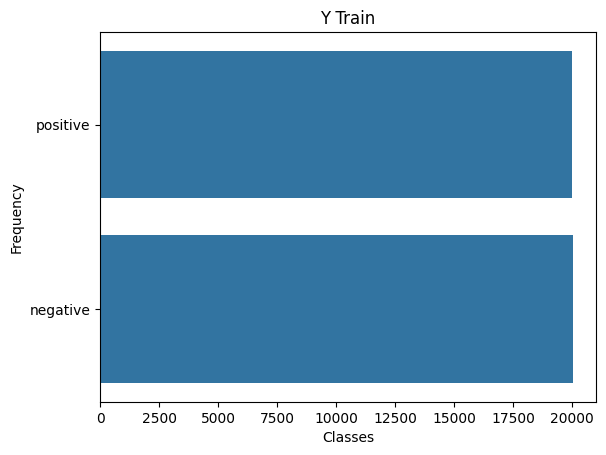

In [41]:
plt.figure()
sns.countplot(ha13_Y_train)
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.title("Y Train")

Text(0.5, 1.0, 'Y Test')

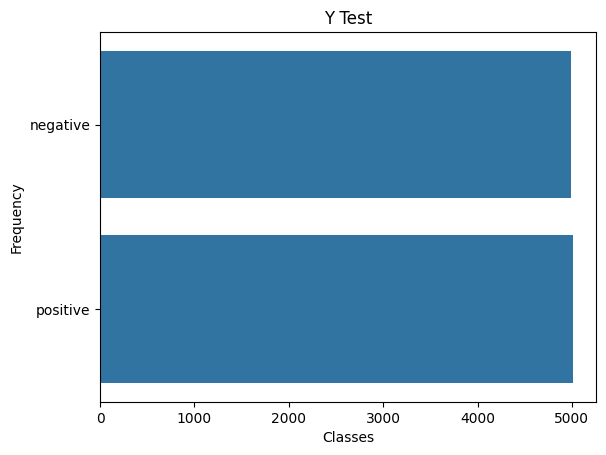

In [42]:
plt.figure()
sns.countplot(ha13_Y_test)
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.title("Y Test")

In [43]:
print(ha13_X_train[0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [44]:
ha13_review_len_train = []
ha13_review_len_test = []

for ha13_i, ha13_j in zip(ha13_X_train, ha13_X_test):
    ha13_review_len_train.append(len(ha13_i))
    ha13_review_len_test.append(len(ha13_j))

In [45]:
print("min: ", min(ha13_review_len_train), "max: ", max(ha13_review_len_train))


min:  80 max:  10363


In [46]:
print("min: ", min(ha13_review_len_test), "max: ", max(ha13_review_len_test))


min:  49 max:  12988


<Axes: ylabel='Density'>

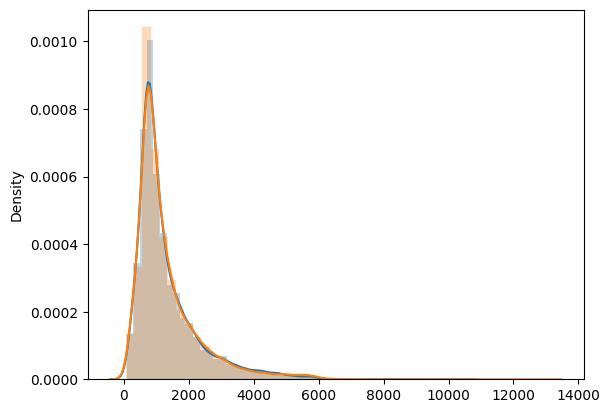

In [47]:
sns.distplot(ha13_review_len_train, hist_kws={"alpha": 0.3})
sns.distplot(ha13_review_len_test, hist_kws={"alpha": 0.3})


In [48]:
print("Train mean: ", np.mean(ha13_review_len_train))
print("Train median: ", np.median(ha13_review_len_train))
print("Train mode: ", stats.mode(ha13_review_len_train))

Train mean:  1309.1245
Train median:  963.0
Train mode:  ModeResult(mode=np.int64(665), count=np.int64(26))


In [49]:
# Number of words
ha13_word_index = imdb.get_word_index()
print(type(ha13_word_index))

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
<class 'dict'>


In [50]:
print("Length of ha13_word_index: ", len(ha13_word_index))

Length of ha13_word_index:  88584


In [51]:
for ha13_keys, ha13_values in ha13_word_index.items():
    if ha13_values == 1:
        print(ha13_keys)

the


In [54]:
def ha13_whatItSay(ha13_index=24):
    ha13_reverse_index = dict([(ha13_value, ha13_key) for (ha13_key, ha13_value) in ha13_word_index.items()])
    # Decode the review using the word indices and the reverse index
    ha13_decode_review = " ".join([ha13_reverse_index.get(i, "!") for i in ha13_X_train[ha13_index]])
    print(ha13_decode_review)
    print(ha13_Y_train[ha13_index])
    return ha13_decode_review

ha13_decoded_review = ha13_whatItSay()


! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! 

In [58]:
ha13_decoded_review = ha13_whatItSay(ha13_index=5)


! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! 

In [59]:
ha13_num_words = 15000
(ha13_X_train, ha13_Y_train), (ha13_X_test, ha13_Y_test) = imdb.load_data(num_words=ha13_num_words)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [60]:
ha13_maxlen = 130
ha13_X_train = pad_sequences(ha13_X_train, maxlen=ha13_maxlen)
ha13_X_test = pad_sequences(ha13_X_test, maxlen=ha13_maxlen)


In [61]:
print("X train shape: ", ha13_X_train.shape)

X train shape:  (25000, 130)


In [62]:
print(ha13_X_train[5])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1  778  128   74   12  630  163   15    4 1766 7982
 1051    2   32   85  156   45   40  148  139  121  664  665   10   10
 1361  173    4  749    2   16 3804    8    4  226   65   12   43  127
   24    2   10   10]


In [63]:
for ha13_i in ha13_X_train[0:10]:
    print(len(ha13_i))


130
130
130
130
130
130
130
130
130
130


In [64]:
ha13_decoded_review = ha13_whatItSay(ha13_index=5)

! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! the effort still been that usually makes for of finished sucking ended and an because before if just though something know novel female i i slowly lot of above and with connect in of script their that out end his and i i
0


In [65]:
ha13_rnn = Sequential()

ha13_rnn.add(Embedding(ha13_num_words, 32, input_length=len(ha13_X_train[0])))  # ha13_num_words=15000
ha13_rnn.add(SimpleRNN(16, input_shape=(ha13_num_words, ha13_maxlen), return_sequences=False, activation="relu"))
ha13_rnn.add(Dense(1))  # Flatten
ha13_rnn.add(Activation("sigmoid"))  # Using sigmoid for binary classification

print(ha13_rnn.summary())
ha13_rnn.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ ?                           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [66]:
ha13_history = ha13_rnn.fit(ha13_X_train, ha13_Y_train, validation_data=(ha13_X_test, ha13_Y_test), epochs=5, batch_size=128, verbose=1)

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - accuracy: 0.5500 - loss: 0.6868 - val_accuracy: 0.7374 - val_loss: 0.6022
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.7517 - loss: 0.5602 - val_accuracy: 0.7975 - val_loss: 0.4717
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step - accuracy: 0.8225 - loss: 0.4251 - val_accuracy: 0.8278 - val_loss: 0.3968
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - accuracy: 0.8558 - loss: 0.3431 - val_accuracy: 0.7759 - val_loss: 0.5139
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.8806 - loss: 0.2930 - val_accuracy: 0.8556 - val_loss: 0.3349


In [67]:
ha13_score = ha13_rnn.evaluate(ha13_X_test, ha13_Y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8547 - loss: 0.3361


In [68]:
print("accuracy:", ha13_score[1] * 100)

accuracy: 85.55999994277954


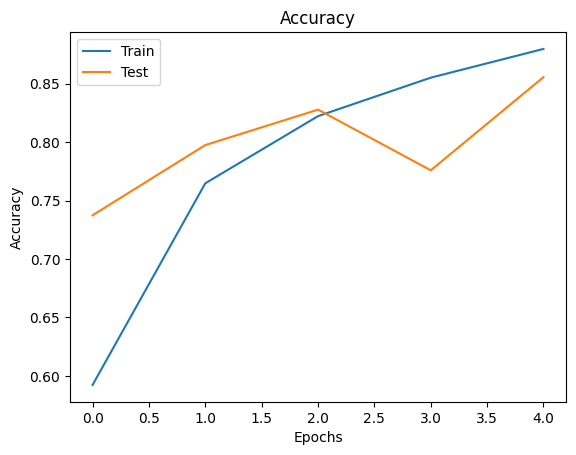

In [71]:
plt.figure()
plt.plot(ha13_history.history["accuracy"],label="Train");
plt.plot(ha13_history.history["val_accuracy"],label="Test");
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show();

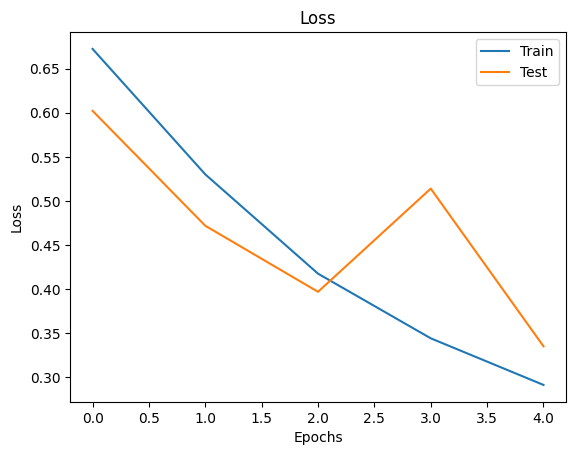

In [72]:
plt.figure()
plt.plot(ha13_history.history["loss"], label="Train")
plt.plot(ha13_history.history["val_loss"], label="Test")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()